In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import json
% matplotlib inline

In [2]:
# Importation des données
path='data/'
data_HR =  pd.read_csv(path+"HR_edges.csv",sep=',')
data_HU =  pd.read_csv(path+"HU_edges.csv",sep=",")
data_RO =  pd.read_csv(path+"RO_edges.csv",sep=",")
genre_HR = pd.read_csv(path+"HR_genres.csv",sep=",")
genre_HU = pd.read_csv(path+"HU_first_genre.csv",sep=",")
genre_RO = pd.read_csv(path+"RO_first_genre.csv",sep=",")
genres_parents = pd.read_csv(path+"genres_parents.csv",sep=',')

In [3]:
# On nettoie ci-dessous nos données
for k in range(len(genre_HU['genre'])):
    if genre_HU.iloc[k,1]=='R&amp;B':
        genre_HU.set_value(k,"genre",'R&B')
    if genre_HU.iloc[k,1]=='Spirituality &amp; Religion':
        genre_HU.set_value(k,"genre",'Spirituality & Religion')
    if genre_HU.iloc[k,1]=='Rock &amp; Roll/Rockabilly':
        genre_HU.set_value(k,"genre",'Rock & Roll/Rockabilly')
    if genre_HU.iloc[k,1]=='Singer &amp; Songwriter':
        genre_HU.set_value(k,"genre",'Singer & Songwriter')
    if genre_HU.iloc[k,1]=='Soul &amp; Funk':
        genre_HU.set_value(k,"genre",'Soul & Funk')
    if genre_HU.iloc[k,1]=='TV shows &amp; movies':
        genre_HU.set_value(k,"genre",'TV shows & movies')
    if genre_HU.iloc[k,1]=='Contemporary R&amp;B':
        genre_HU.set_value(k,"genre",'Contemporary R&B')
    if genre_HU.iloc[k,1]=='Oldschool R&amp;B':
        genre_HU.set_value(k,"genre",'Oldschool R&B')
for k in range(len(genre_RO['genre'])):    
    if genre_RO.iloc[k,1]=='R&amp;B':
        genre_RO.set_value(k,"genre",'R&B')
    if genre_RO.iloc[k,1]=='Spirituality &amp; Religion':
        genre_RO.set_value(k,"genre",'Spirituality & Religion')
    if genre_RO.iloc[k,1]=='Rock &amp; Roll/Rockabilly':
        genre_RO.set_value(k,"genre",'Rock & Roll/Rockabilly')
    if genre_RO.iloc[k,1]=='Singer &amp; Songwriter':
        genre_RO.set_value(k,"genre",'Singer & Songwriter')
    if genre_RO.iloc[k,1]=='Soul &amp; Funk':
        genre_RO.set_value(k,"genre",'Soul & Funk')
    if genre_RO.iloc[k,1]=='TV shows &amp; movies':
        genre_RO.set_value(k,"genre",'TV shows & movies')
    if genre_RO.iloc[k,1]=='Contemporary R&amp;B':
        genre_RO.set_value(k,"genre",'Contemporary R&B')
    if genre_RO.iloc[k,1]=='Oldschool R&amp;B':
        genre_RO.set_value(k,"genre",'Oldschool R&B')
    if genre_RO.iloc[k,1]=='Kids &amp; Family':
        genre_RO.set_value(k,"genre",'Kids & Family')


## Etude pour la Croatie

### Représentation

In [ ]:
M_HR=np.zeros([max(data_HR["node_1"]+1),max(data_HR["node_1"])+1])
for k in range((len(data_HR))):
        M_HR[data_HR.iloc[k,0],data_HR.iloc[k,1]]=1

In [4]:
dic_genre2={}
for k in genres_parents["parent"].unique():
    dic_genre2[k]=[]
for k in range(len(genre_HR)):
    A=genre_HR["genre"][k]
    B=genres_parents.loc[genres_parents["genre"]==A]["parent"].values[0]
    dic_genre2[B].append(genre_HR["id"][k])

In [ ]:
# Proba de Style1/Style2 <=> Probabilité d'un lien avec le Style1 sachant qu'on est dans un cluster Style2

L2=[]
#On créé une liste L des différents style
for k in dic_genre2:
    L2.append(k)
# On initialise à 0 notre matrice de Proba :
Prob_HR2=np.zeros([len(L2),len(L2)])
# On parcoure chaque ligne de la matrice
for i in range(len(L2)):
    print(i)
    for j in dic_genre2[L2[i]]:
        for k in range(len(L2)):
            if sum(M_HR[j])!=0:
                Prob_HR2[i,k]+=sum(M_HR[j,l] for l in dic_genre2[L2[k]])/sum(M_HR[j])
    Prob_HR2[i]=Prob_HR2[i]/sum(Prob_HR2[i])

In [5]:
#np.savetxt('Prob_HR2.txt', Prob_HR2)
L2=['folk','jazz','electronic','country','reggae','classical','others','pop/rock','blues','traditional','hip-hop','funk/soul']

In [6]:
Prob_HR2 = np.loadtxt("Prob_HR2.txt")
Prob_HR2

array([[0.04521239, 0.00204555, 0.25723772, 0.0055173 , 0.05091037,
        0.00367044, 0.13371442, 0.39461461, 0.0024095 , 0.00744064,
        0.09385889, 0.00336817],
       [0.02622778, 0.01374316, 0.22259011, 0.0087459 , 0.04861744,
        0.01552579, 0.14415281, 0.42020265, 0.00632946, 0.00593393,
        0.08643386, 0.00149709],
       [0.0336917 , 0.0029509 , 0.26867487, 0.00442387, 0.05536974,
        0.0053707 , 0.14425817, 0.37881713, 0.00196539, 0.00850755,
        0.09368239, 0.0022876 ],
       [0.03821319, 0.0061287 , 0.22507566, 0.01114466, 0.05074097,
        0.01019812, 0.12032522, 0.43242317, 0.00318254, 0.0137598 ,
        0.08717108, 0.0016369 ],
       [0.02945175, 0.00354232, 0.26022756, 0.00425206, 0.05687895,
        0.00704879, 0.15352075, 0.38195903, 0.00245111, 0.00771358,
        0.09066873, 0.00228537],
       [0.03224153, 0.00965357, 0.22032054, 0.00818264, 0.02722493,
        0.02055289, 0.14798938, 0.43073042, 0.00670429, 0.00648863,
        0.08352315,

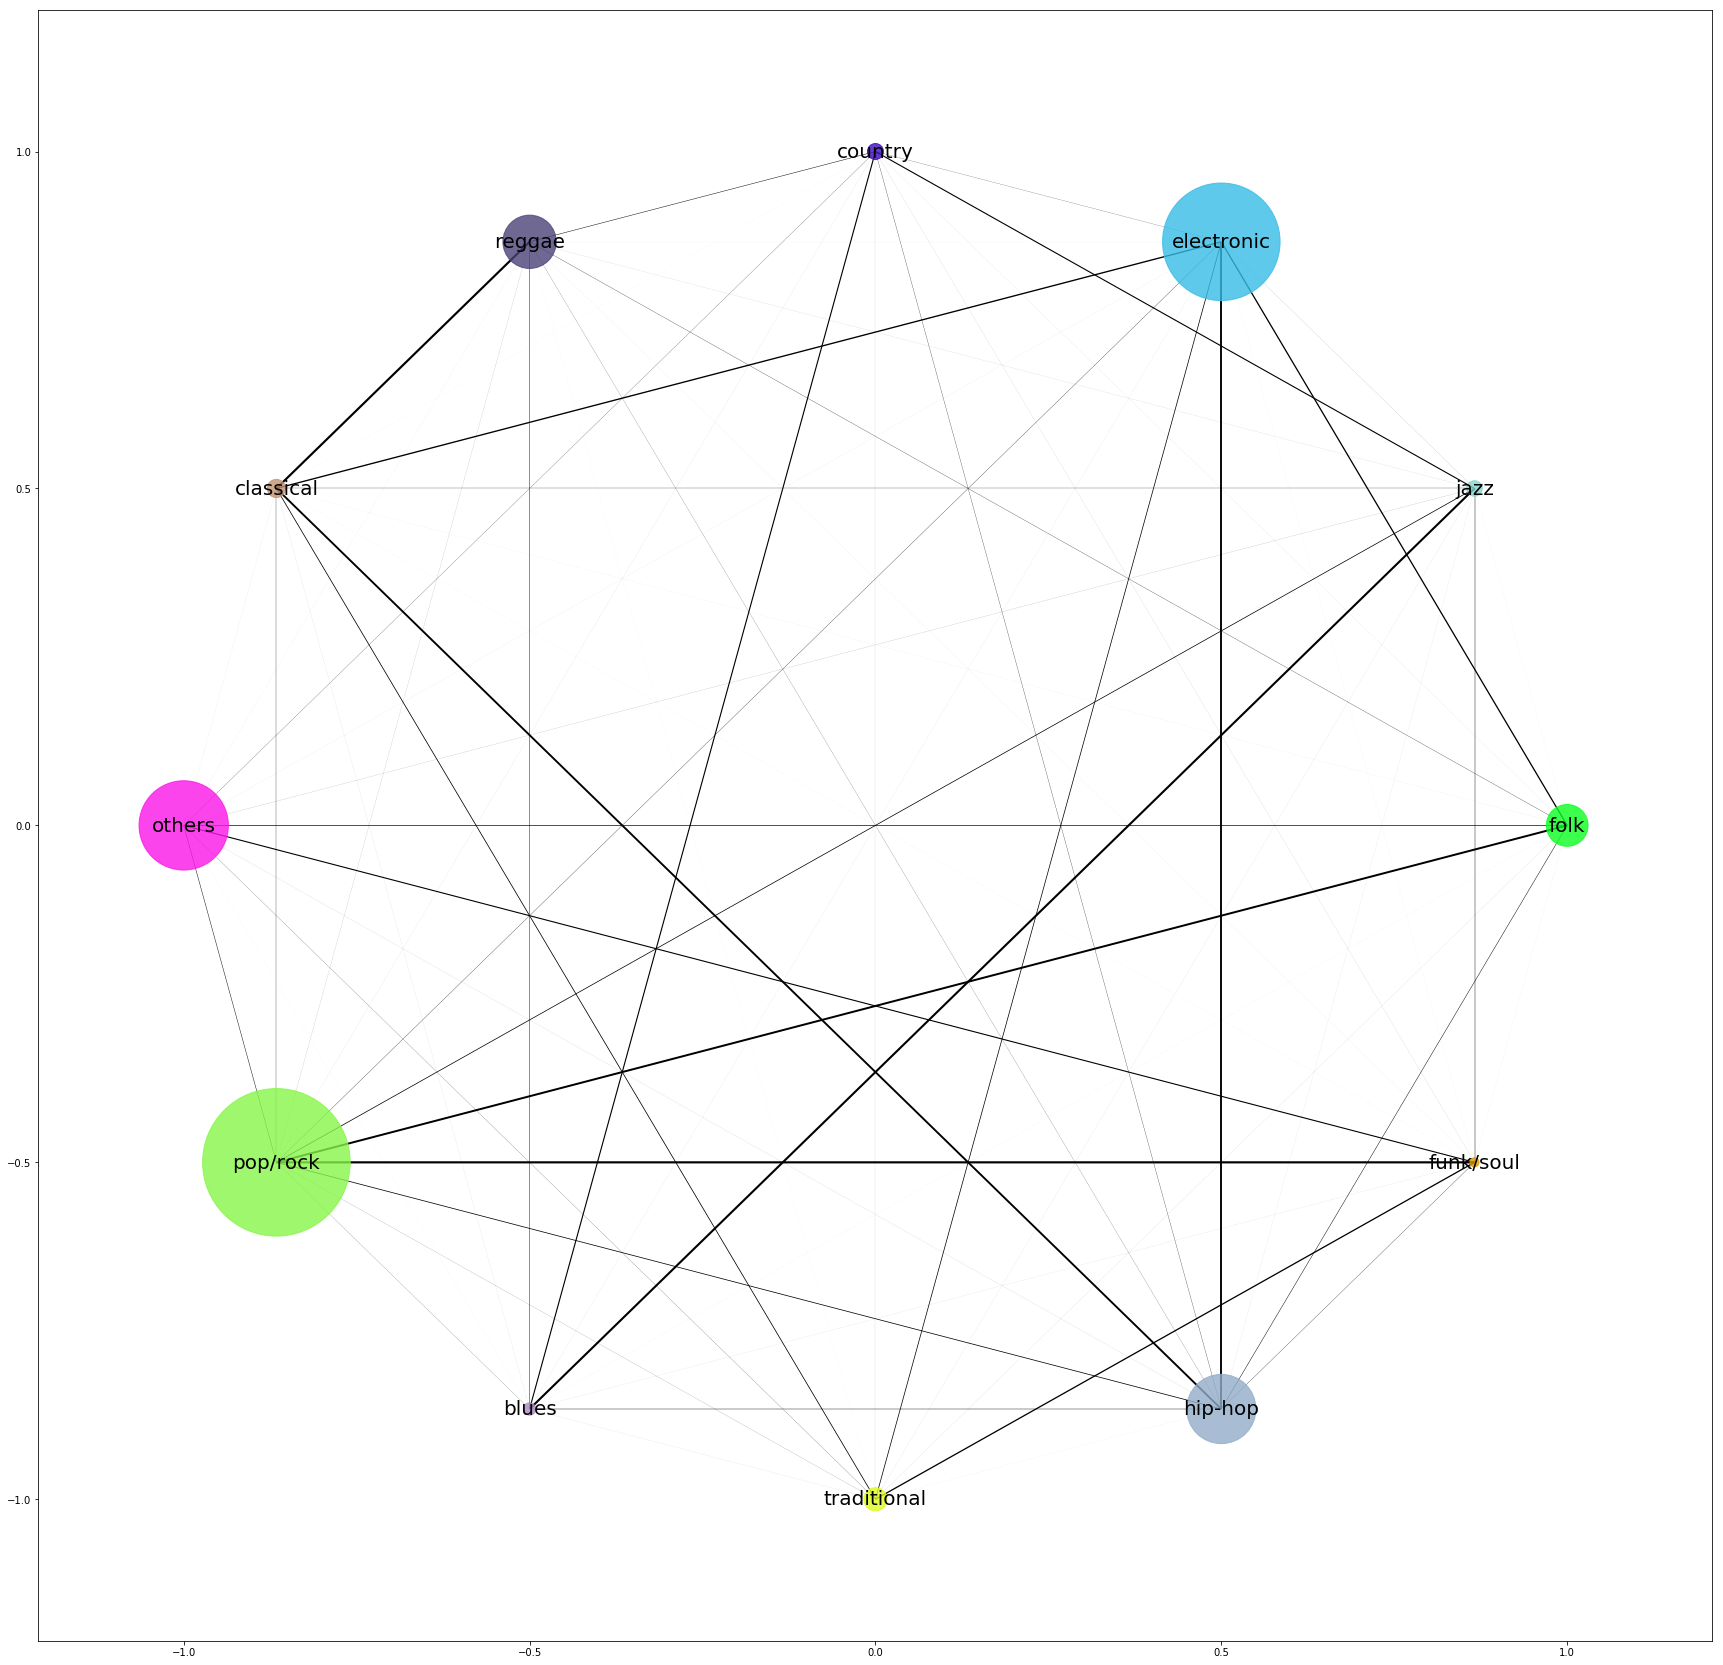

In [7]:
colors2 = []
for i in range(len(L2)):
    colors2.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
G2=nx.Graph()
G2.add_nodes_from(range(len(L2)))
list_edges=[]
dict_weight={}
labels={}
for row in range(len(Prob_HR2)):
    labels[row]=L2[row]
    for column in range(len(Prob_HR2)):
        if Prob_HR2[row][column]!=0:
            list_edges.append((row,column))
            dict_weight[(row,column)]=Prob_HR2[row][column]
list_edges
dict_weight
G2.add_edges_from(list_edges)
#pos=nx.fruchterman_reingold_layout(G2) 
#pos=nx.random_layout(G2) 
pos=nx.circular_layout(G2)
#pos=nx.spring_layout(G2)
node_size=[]
edge_width=[]
for style in L2:
    node_size.append(len(dic_genre2[style]))
for edge in list_edges:
    edge_width.append(5*Prob_HR2[edge[0]][edge[1]])
    


plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(G2,pos,node_color=colors2,node_size=node_size,alpha=0.8,label=L2)
nx.draw_networkx_edges(G2,pos,width=edge_width)
nx.draw_networkx_labels(G2,pos,font_size=20,labels=labels)
plt.show()

## Etude pour la Hongrie

In [8]:
M_HU=np.zeros([max(data_HU["node_2"]+1),max(data_HU["node_2"])+1])
for k in range((max(data_HU["node_2"]))):
        M_HU[data_HU.iloc[k,0],data_HU.iloc[k,1]]=1

In [ ]:
# Proba de Style1/Style2 <=> Probabilité d'un lien avec le Style1 sachant qu'on est dans un cluster Style2
LHU2=[]
#On créé une liste L des différents style
for k in dic_genre2:
    LHU2.append(k)
# On initialise à 0 notre matrice de Proba :
Prob_HU2=np.zeros([len(LHU2),len(LHU2)])
# On parcoure chaque ligne de la matrice
for i in range(len(LHU2)):
    print(i)
    for j in dic_genre2[LHU2[i]]:
        for k in range(len(LHU2)):
            if sum(M_HU[j])!=0:
                Prob_HU2[i,k]+=sum(M_HU[j,l] for l in dic_genre2[LHU2[k]])/sum(M_HU[j])
    if sum(Prob_HU2[i])!=0: # Ce cas apparaît quand dans un style personne n'a d'amis
        Prob_HU2[i]=Prob_HU2[i]/sum(Prob_HU2[i])

In [9]:
#np.savetxt('Prob_HU2.txt', Prob_HU2)
LHU2=['folk','jazz','electronic','country','reggae','classical','others','pop/rock','blues','traditional','hip-hop','funk/soul']
Prob_HU2 = np.loadtxt("Prob_HU2.txt")

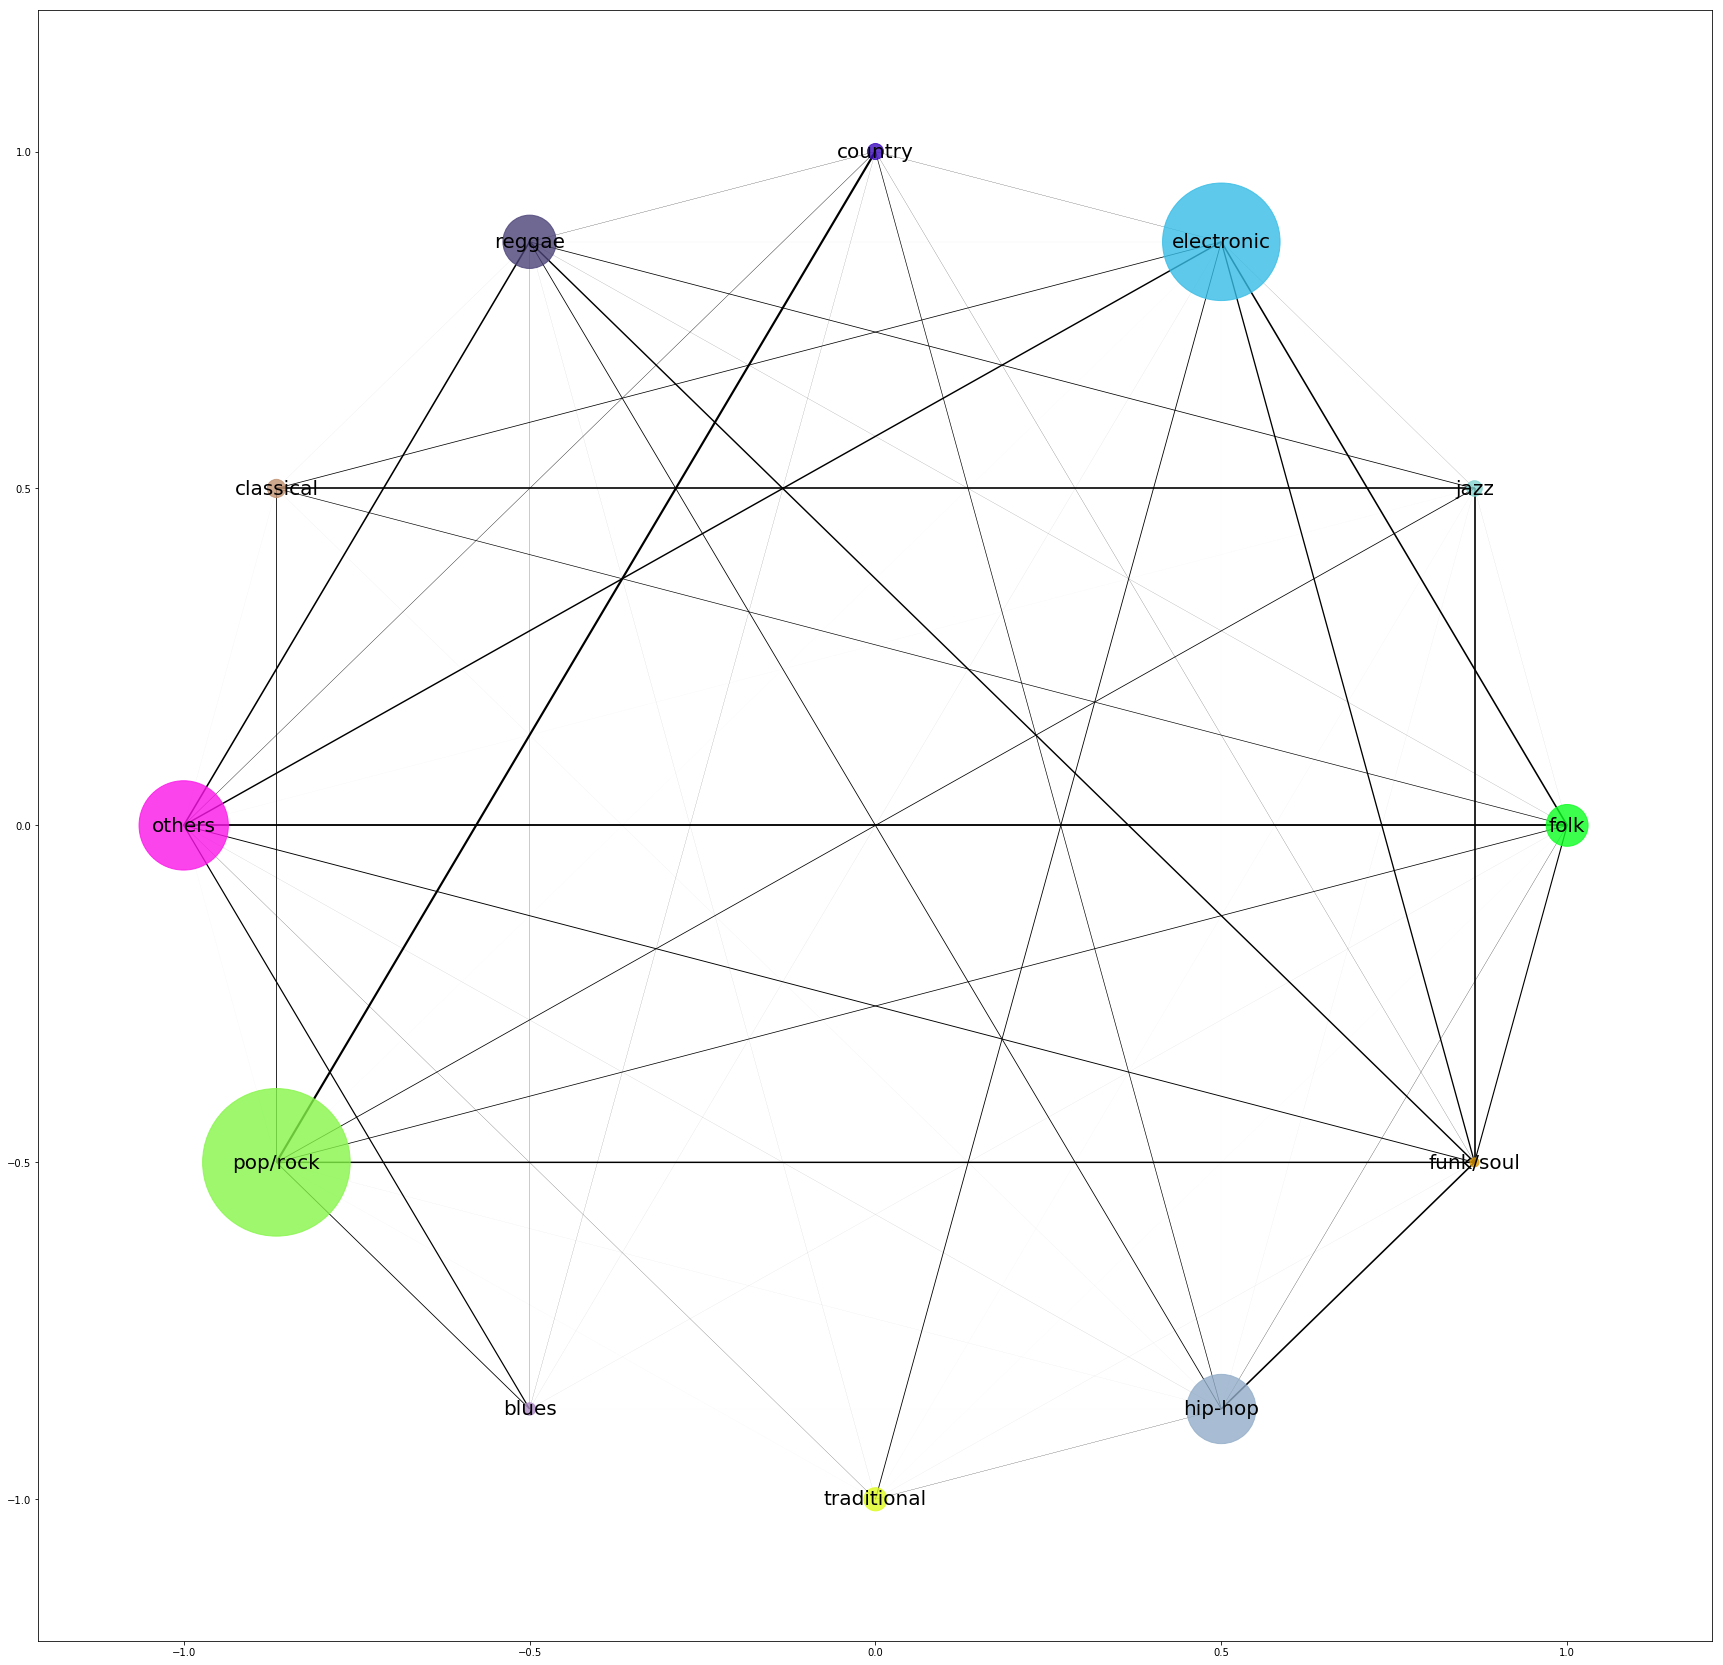

In [10]:
LHU2=L2
colors = []
for i in range(len(LHU2)):
    colors.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
GHU2=nx.Graph()
GHU2.add_nodes_from(range(len(LHU2)))
list_edges=[]
dict_weight={}
labels={}
for row in range(len(Prob_HU2)):
    labels[row]=LHU2[row]
    for column in range(len(Prob_HU2)):
        if Prob_HU2[row][column]!=0:
            list_edges.append((row,column))
            dict_weight[(row,column)]=Prob_HU2[row][column]

GHU2.add_edges_from(list_edges)
#pos=nx.fruchterman_reingold_layout(GHU2) 
#pos=nx.random_layout(GHU2) 
pos=nx.circular_layout(G2)
#pos=nx.spring_layout(G2)
node_size=[]
edge_width=[]
for style in LHU2:
    node_size.append(len(dic_genre2[style]))
for edge in list_edges:
    edge_width.append(5*Prob_HU2[edge[0]][edge[1]])
    


plt.figure(figsize=(30,30))
nx.draw_networkx_nodes(GHU2,pos,node_color=colors2,node_size=node_size,alpha=0.8,label=LHU2)
nx.draw_networkx_edges(GHU2,pos,width=edge_width)
nx.draw_networkx_labels(GHU2,pos,font_size=20,labels=labels)
plt.show()

## Etude pour la Roumanie

In [11]:
M_RO=np.zeros([max(data_RO["node_2"]+1),max(data_RO["node_2"])+1])
for k in range((max(data_RO["node_2"]))):
        M_RO[data_RO.iloc[k,0],data_RO.iloc[k,1]]=1

In [ ]:
# Proba de Style1/Style2 <=> Probabilité d'un lien avec le Style1 sachant qu'on est dans un cluster Style2
LRO2=[]
#On créé une liste L des différents style
for k in dic_genre2:
    LRO2.append(k)
# On initialise à 0 notre matrice de Proba :
Prob_RO2=np.zeros([len(LRO2),len(LRO2)])
# On parcoure chaque ligne de la matrice
for i in range(len(LRO2)):
    print(i)
    for j in dic_genre2[LRO2[i]]:
        for k in range(len(LRO2)):
            if sum(M_RO[j])!=0:
                Prob_RO2[i,k]+=sum(M_RO[j,l] for l in dic_genre2[LRO2[k]])/sum(M_RO[j])
    Prob_RO2[i]=Prob_RO2[i]/sum(Prob_RO2[i])

In [13]:
Prob_RO2test=np.loadtxt('Prob_RO2.txt')

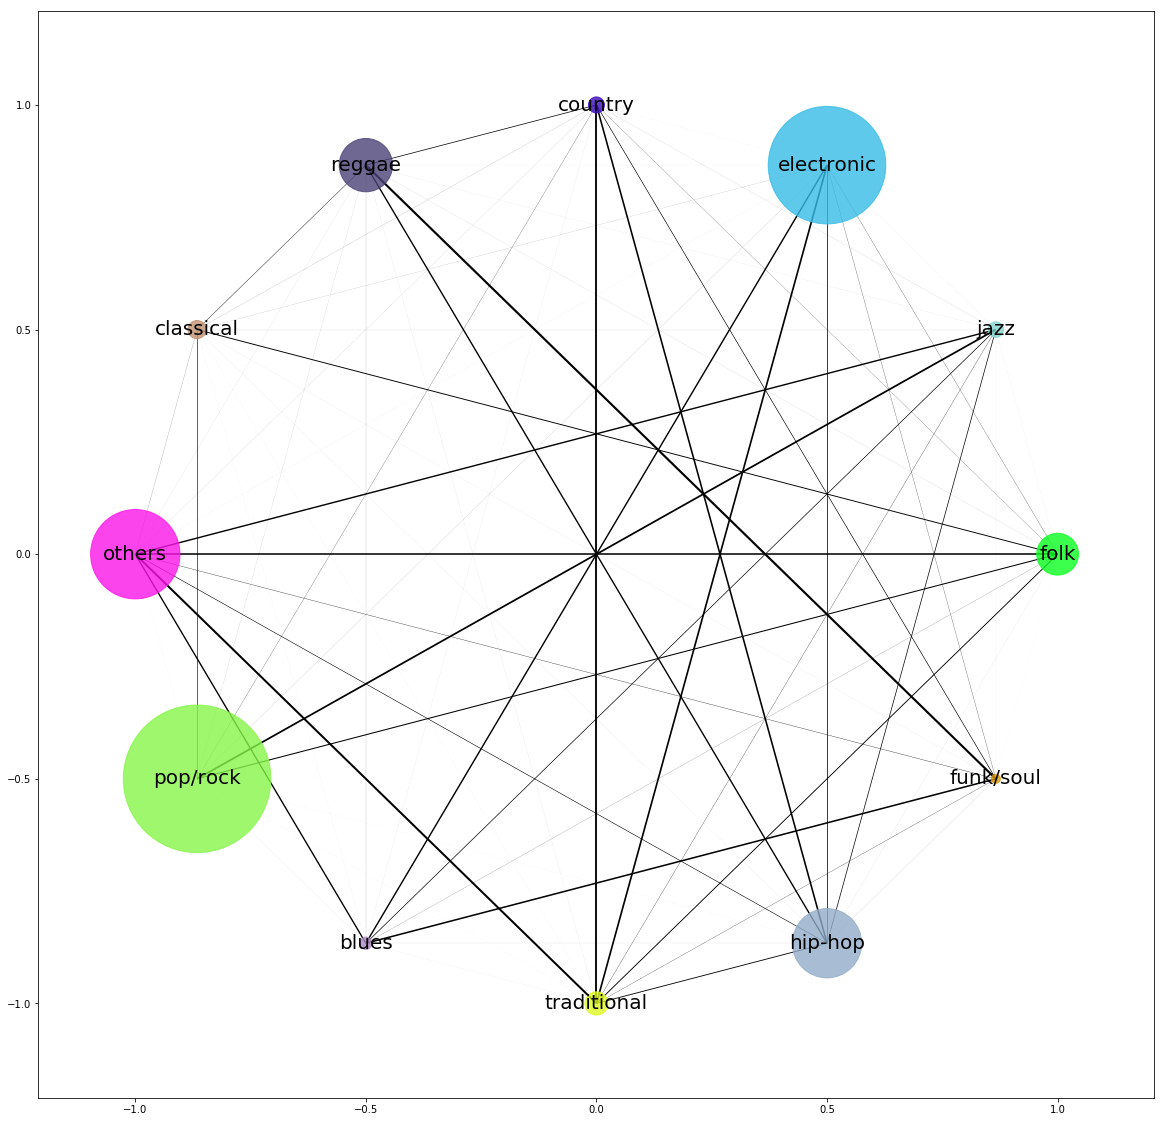

In [14]:
LRO2=L2
colors = []
for i in range(len(LRO2)):
    colors.append('#'+'%06X' % random.randint(0, 0xFFFFFF))
GRO2=nx.Graph()
GRO2.add_nodes_from(range(len(LRO2)))
list_edges=[]
dict_weight={}
labels={}
for row in range(len(Prob_RO2test)):
    labels[row]=L2[row]
    for column in range(len(Prob_RO2test)):
        if Prob_RO2test[row][column]!=0:
            list_edges.append((row,column))
            dict_weight[(row,column)]=Prob_RO2test[row][column]

GRO2.add_edges_from(list_edges)
#pos=nx.fruchterman_reingold_layout(GRO2) 
#pos=nx.random_layout(GRO) 
pos=nx.circular_layout(G2)
#pos=nx.spring_layout(G2)
node_size=[]
edge_width=[]
for style in L2:
    node_size.append(len(dic_genre2[style]))
for edge in list_edges:
    edge_width.append(5*Prob_RO2test[edge[0]][edge[1]])
    


plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(GRO2,pos,node_color=colors2,node_size=node_size,alpha=0.8,label=L2)
nx.draw_networkx_edges(GRO2,pos,width=edge_width)
nx.draw_networkx_labels(GRO2,pos,font_size=20,labels=labels)
plt.show()

## Comparaison en terme de degrés des trois datasets

Ici on mets en places les trois graphs correspondant aux trois datasets et leur liens d'amitié :

In [15]:
dic_genre2={}
for k in genres_parents["parent"].unique():
    dic_genre2[k]=[]
for k in range(len(genre_HR)):
    A=genre_HR["genre"][k]
    B=genres_parents.loc[genres_parents["genre"]==A]["parent"].values[0]
    dic_genre2[B].append(genre_HR["id"][k])




df1 = data_HR["node_2"]
G_users=nx.Graph()
G_users.add_nodes_from(range(max(data_HR["node_1"])))
for row in range(len(df1)):
    G_users.add_edge(data_HR["node_1"][row],data_HR["node_2"][row])

In [16]:
dic_genre2HU={}
for k in genres_parents["parent"].unique():
    dic_genre2HU[k]=[]
for k in range(len(genre_HU)):
    A=genre_HU["genre"][k]
    B=genres_parents.loc[genres_parents["genre"]==A]["parent"].values[0]
    dic_genre2HU[B].append(genre_HU["id"][k])



df1 = data_HU["node_2"]
G_users2=nx.Graph()
G_users2.add_nodes_from(range(max(data_HU["node_1"])))
for row in range(len(df1)):
    G_users2.add_edge(data_HU["node_1"][row],data_HU["node_2"][row])

In [17]:
dic_genre2RO={}
for k in genres_parents["parent"].unique():
    dic_genre2RO[k]=[]
for k in range(len(genre_RO)):
    A=genre_RO["genre"][k]
    B=genres_parents.loc[genres_parents["genre"]==A]["parent"].values[0]
    dic_genre2RO[B].append(genre_RO["id"][k])




df1 = data_RO["node_2"]
G_users3=nx.Graph()
G_users3.add_nodes_from(range(max(data_RO["node_1"])))
for row in range(len(df1)):
    G_users3.add_edge(data_RO["node_1"][row],data_RO["node_2"][row])

In [18]:
dict_style ={}
for k in range(len(L2)):
    deg_list=[]
    for j in (dic_genre2[L2[k]]):
        deg_list.append(G_users.degree(j))
    dict_style[L2[k]]=deg_list
dict_style

{'blues': [9,
  2,
  2,
  4,
  9,
  7,
  3,
  15,
  1,
  14,
  4,
  7,
  13,
  7,
  27,
  6,
  14,
  9,
  6,
  4,
  3,
  3,
  14,
  33,
  2,
  18,
  9,
  3,
  16,
  2,
  14,
  3,
  1,
  4,
  10,
  3,
  1,
  4,
  1,
  6,
  2,
  8,
  8,
  2,
  4,
  25,
  33,
  33,
  7,
  28,
  10,
  17,
  10,
  16,
  63,
  3,
  42,
  23,
  1,
  1,
  7,
  2,
  2,
  9,
  7,
  5,
  8,
  3,
  69,
  4,
  2,
  14,
  2,
  3,
  14,
  30,
  41,
  3,
  8,
  10,
  7,
  15,
  21,
  4,
  20,
  8,
  49,
  16,
  9,
  10,
  4,
  11,
  3,
  9,
  55,
  1,
  1,
  4,
  26,
  6,
  15,
  9,
  3,
  6,
  19,
  18,
  2,
  3,
  20,
  3,
  6,
  4,
  4,
  16,
  15,
  3,
  4,
  1,
  7,
  43,
  1,
  2,
  12,
  1,
  46,
  2,
  5,
  56,
  8,
  39,
  1,
  2,
  49,
  2,
  34,
  9,
  3,
  3,
  33,
  64,
  5,
  37,
  11,
  9,
  3,
  6,
  7,
  20,
  6,
  21,
  5,
  3,
  1],
 'classical': [3,
  11,
  13,
  17,
  5,
  6,
  4,
  8,
  49,
  15,
  5,
  10,
  16,
  16,
  46,
  5,
  43,
  18,
  23,
  9,
  4,
  28,
  25,
  4,
  46,
  15,
  28,
  76

In [19]:
dict_style2 ={}
for k in range(len(L2)):
    deg_list=[]
    for j in (dic_genre2HU[L2[k]]):
        deg_list.append(G_users2.degree(j))
    dict_style2[L2[k]]=deg_list
dict_style2

{'blues': [4,
  6,
  3,
  9,
  2,
  15,
  12,
  5,
  1,
  18,
  4,
  1,
  15,
  16,
  10,
  5,
  5,
  7,
  7,
  11,
  10,
  7,
  2,
  4,
  1,
  11,
  2,
  1,
  2,
  8,
  5,
  3,
  10,
  9,
  10,
  2,
  19,
  3,
  3,
  19,
  12,
  5,
  2,
  7,
  4,
  2,
  8,
  14,
  2,
  3,
  8,
  1,
  2,
  6,
  2,
  3,
  3,
  4,
  3,
  14,
  5,
  13,
  1,
  11,
  1,
  3,
  7,
  8,
  11,
  8,
  7,
  5,
  4,
  9,
  5,
  6,
  3,
  1,
  10,
  9,
  21,
  1,
  1,
  3,
  11,
  1,
  6,
  6,
  14,
  5,
  5,
  4,
  5,
  15,
  3,
  6,
  4,
  4,
  4,
  3,
  13,
  4,
  8,
  3,
  12,
  1,
  4,
  6,
  3,
  2,
  6,
  5,
  4,
  1,
  18,
  5,
  3],
 'classical': [19,
  1,
  3,
  7,
  12,
  1,
  7,
  7,
  3,
  7,
  3,
  9,
  17,
  6,
  13,
  7,
  17,
  4,
  20,
  1,
  12,
  3,
  2,
  2,
  6,
  1,
  4,
  12,
  10,
  2,
  3,
  3,
  8,
  13,
  2,
  3,
  5,
  5,
  13,
  11,
  12,
  18,
  1,
  7,
  11,
  3,
  23,
  6,
  1,
  1,
  8,
  10,
  3,
  3,
  6,
  12,
  4,
  8,
  8,
  5,
  13,
  2,
  4,
  1,
  3,
  29,
  12,
  22,
  5

In [20]:
dict_style3 ={}
for k in range(len(L2)):
    deg_list=[]
    for j in (dic_genre2RO[L2[k]]):
        deg_list.append(G_users3.degree(j))
    dict_style3[L2[k]]=deg_list    
dict_style3

{'blues': [2,
  19,
  1,
  7,
  2,
  2,
  2,
  4,
  4,
  1,
  7,
  2,
  2,
  4,
  3,
  2,
  3,
  1,
  4,
  3,
  6,
  4,
  1,
  10,
  1,
  3,
  2,
  4,
  7,
  1,
  8,
  1,
  1,
  4,
  3,
  4,
  7,
  1,
  1,
  1,
  4,
  13,
  10,
  5,
  2,
  2,
  5,
  3,
  3,
  1,
  4,
  7,
  4,
  8,
  1,
  1,
  17,
  3,
  3,
  1,
  4,
  5,
  3,
  6,
  1,
  10,
  1,
  1,
  4,
  2,
  8,
  1,
  1,
  1,
  1,
  5,
  2,
  5,
  1,
  1,
  4,
  8,
  2,
  3,
  6,
  3,
  13,
  2],
 'classical': [5,
  3,
  3,
  1,
  4,
  1,
  9,
  7,
  5,
  2,
  9,
  2,
  1,
  5,
  11,
  1,
  22,
  3,
  8,
  3,
  6,
  2,
  10,
  7,
  11,
  5,
  4,
  4,
  6,
  7,
  6,
  8,
  4,
  10,
  3,
  18,
  1,
  12,
  7,
  5,
  10,
  13,
  1,
  4,
  4,
  12,
  5,
  4,
  8,
  2,
  2,
  10,
  5,
  14,
  1,
  14,
  6,
  1,
  4,
  1,
  3,
  3,
  10,
  2,
  7,
  4,
  12,
  2,
  4,
  2,
  4,
  4,
  5,
  4,
  5,
  6,
  9,
  1,
  4,
  2,
  1,
  2,
  4,
  6,
  9,
  9,
  2,
  1,
  4,
  1,
  3,
  2,
  9,
  1,
  4,
  4,
  4,
  1,
  2,
  6,
  6,
  4,
  2,


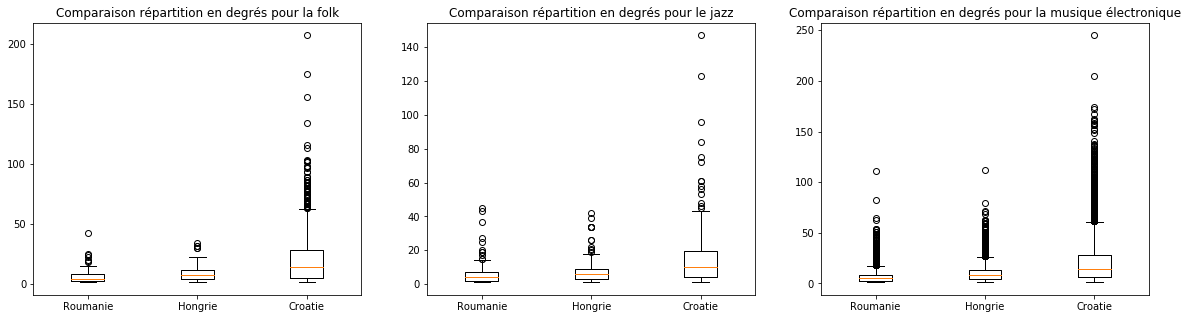

In [21]:
fig = plt.figure(figsize=(20,5))
plt.subplot(131)
plt.boxplot([dict_style3["folk"],dict_style2["folk"],dict_style["folk"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour la folk")
plt.legend()
plt.subplot(132)
plt.boxplot([dict_style3["jazz"],dict_style2["jazz"],dict_style["jazz"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le jazz")
plt.legend()
plt.subplot(133)
plt.boxplot([dict_style3["electronic"],dict_style2["electronic"],dict_style["electronic"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour la musique électronique")
plt.legend()
plt.show()

Text(0.5,1,'Comparaison répartition en degrés pour le classique')

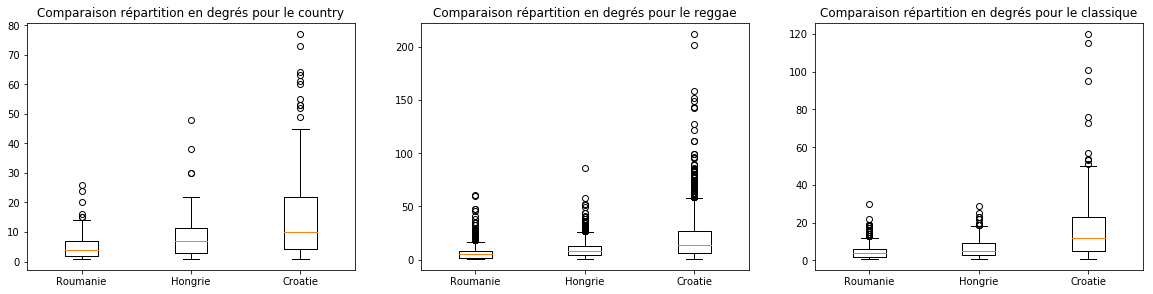

In [22]:
fig = plt.figure(figsize=(20,10))
plt.subplot(231)
plt.boxplot([dict_style3["country"],dict_style2["country"],dict_style["country"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le country")
plt.subplot(232)
plt.boxplot([dict_style3["reggae"],dict_style2["reggae"],dict_style["reggae"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le reggae")

plt.subplot(233)
plt.boxplot([dict_style3["classical"],dict_style2["classical"],dict_style["classical"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le classique")

Text(0.5,1,'Comparaison répartition en degrés pour le blues')

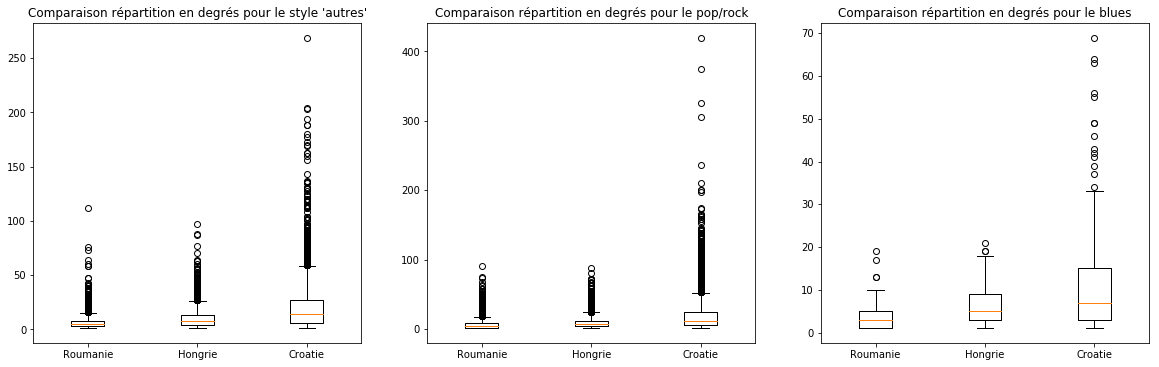

In [23]:
fig = plt.figure(figsize=(20,20))
plt.subplot(331)
plt.boxplot([dict_style3["others"],dict_style2["others"],dict_style["others"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le style 'autres'")

plt.subplot(332)
plt.boxplot([dict_style3["pop/rock"],dict_style2["pop/rock"],dict_style["pop/rock"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le pop/rock")

plt.subplot(333)
plt.boxplot([dict_style3["blues"],dict_style2["blues"],dict_style["blues"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le blues")

Text(0.5,1,'Comparaison répartition en degrés pour la funk/soul')

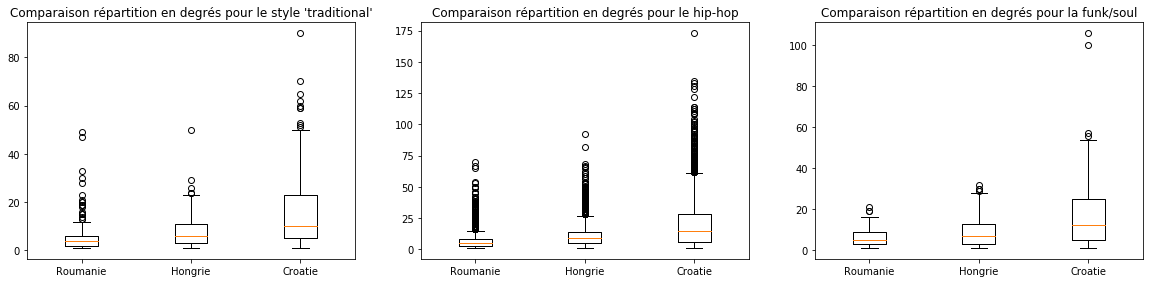

In [24]:
fig = plt.figure(figsize=(20,20))
plt.subplot(431)
plt.boxplot([dict_style3["traditional"],dict_style2["traditional"],dict_style["traditional"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le style 'traditional'")

plt.subplot(432)
plt.boxplot([dict_style3["hip-hop"],dict_style2["hip-hop"],dict_style["hip-hop"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour le hip-hop")

plt.subplot(433)
plt.boxplot([dict_style3["funk/soul"],dict_style2["funk/soul"],dict_style["funk/soul"]],labels=["Roumanie","Hongrie","Croatie"])
plt.title("Comparaison répartition en degrés pour la funk/soul")
